Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [28]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All columns contain numeric data except Sex column which is categorical feature.

In [30]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above table we can see only height feature have minimum value equal to 0.

In [31]:
df[df.Height==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two records where height equal to zero.

In [32]:
df.shape

(4177, 9)

Dataset contain 4177 rows and 9 Columns.

As mentioned in problem age is calculated by adding 1.5 to ring column

In [33]:
df['Age']=df['Rings']+1.5
df=df.drop('Rings',axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


New Column Age is added as target varible as mentioned in dataset details.

Checking for any missing value if any

In [34]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [35]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [36]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# EDA

## Univariate anaylsis

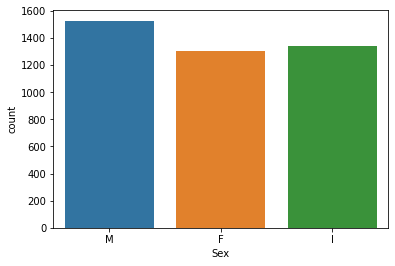

In [37]:
sn.countplot(df['Sex'])

Male high highest number of count followed by infant

Text(0.5, 0, 'Age')

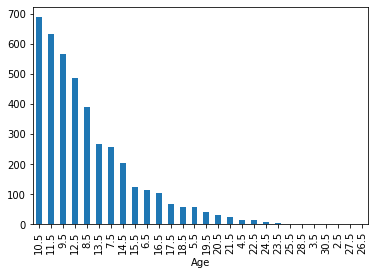

In [41]:
# Plotting age feature with count of records
df['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')

The above graph shows that most count of abalones is having age 10.5 and 11.5 and low records of abalone is between 19.5 and 23.5.

Plotting the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc74a15b950>,
      dtype=object)

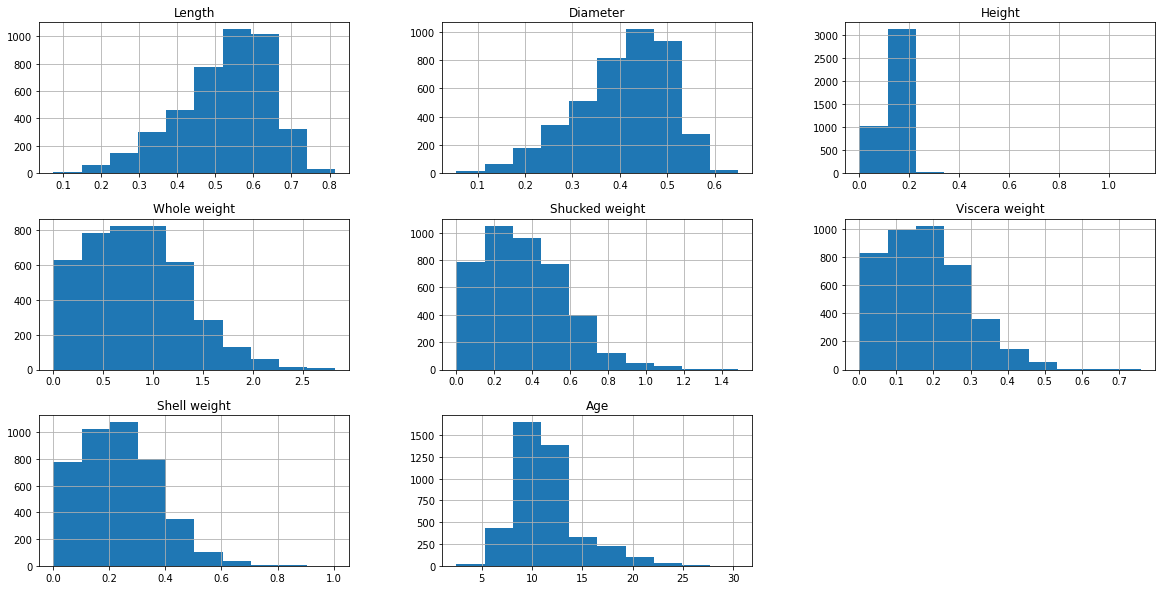

In [44]:
df.hist(figsize=(20,10))

Histogram shows that data is skewed so it will important to measure it and also the height feature shows some possible outliers.

Plotting the distribution plot for 8 features leading to find age of abalone

In [47]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [57]:
numerical_feature=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']

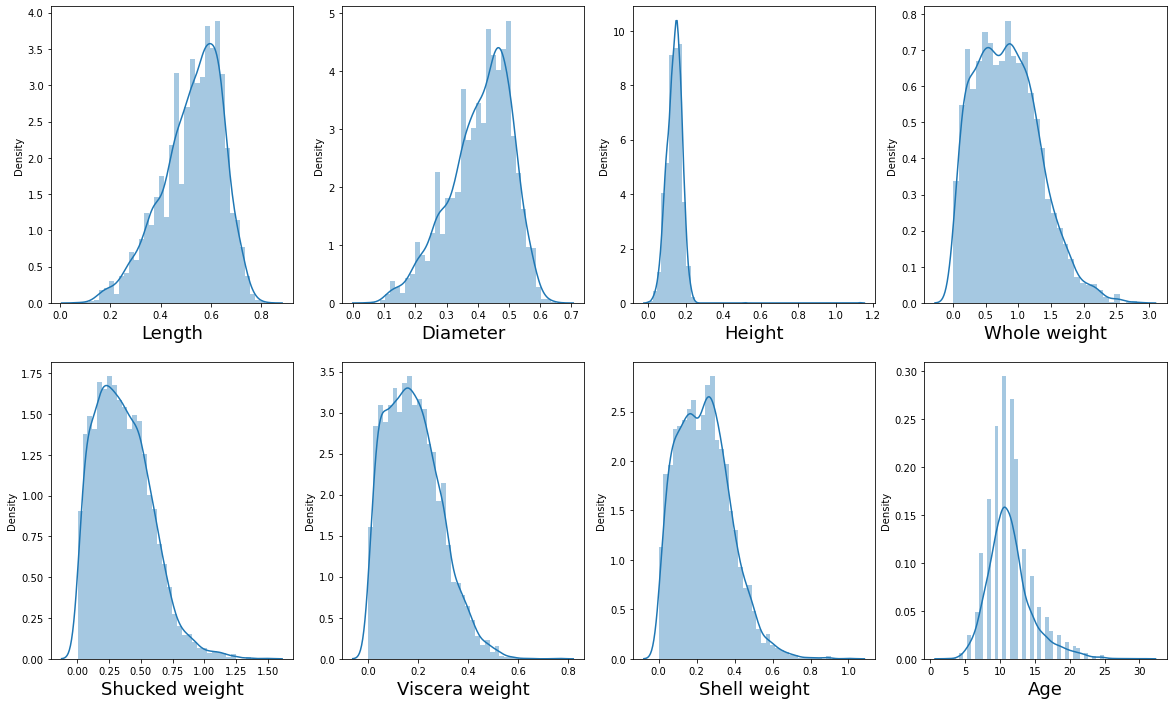

In [69]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[numerical_feature]:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

From the above distribution plot for height curve is left skewed and all the the other column does not have normal distribution curve.
We will need to perform oultier and skewness removal methods.

# Identifying the oultier using box plot

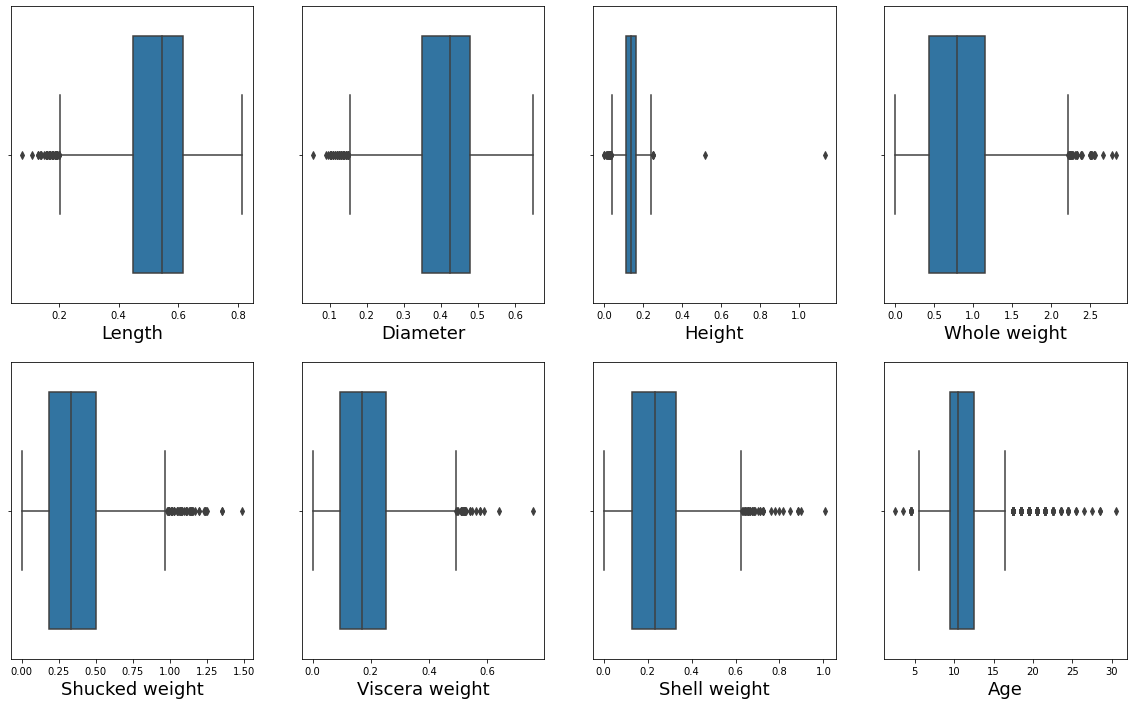

In [71]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in df[numerical_feature]:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

All the columns have some outliers in the data and but height features show highest outlier follwed by age.

# Bivariate Analysis

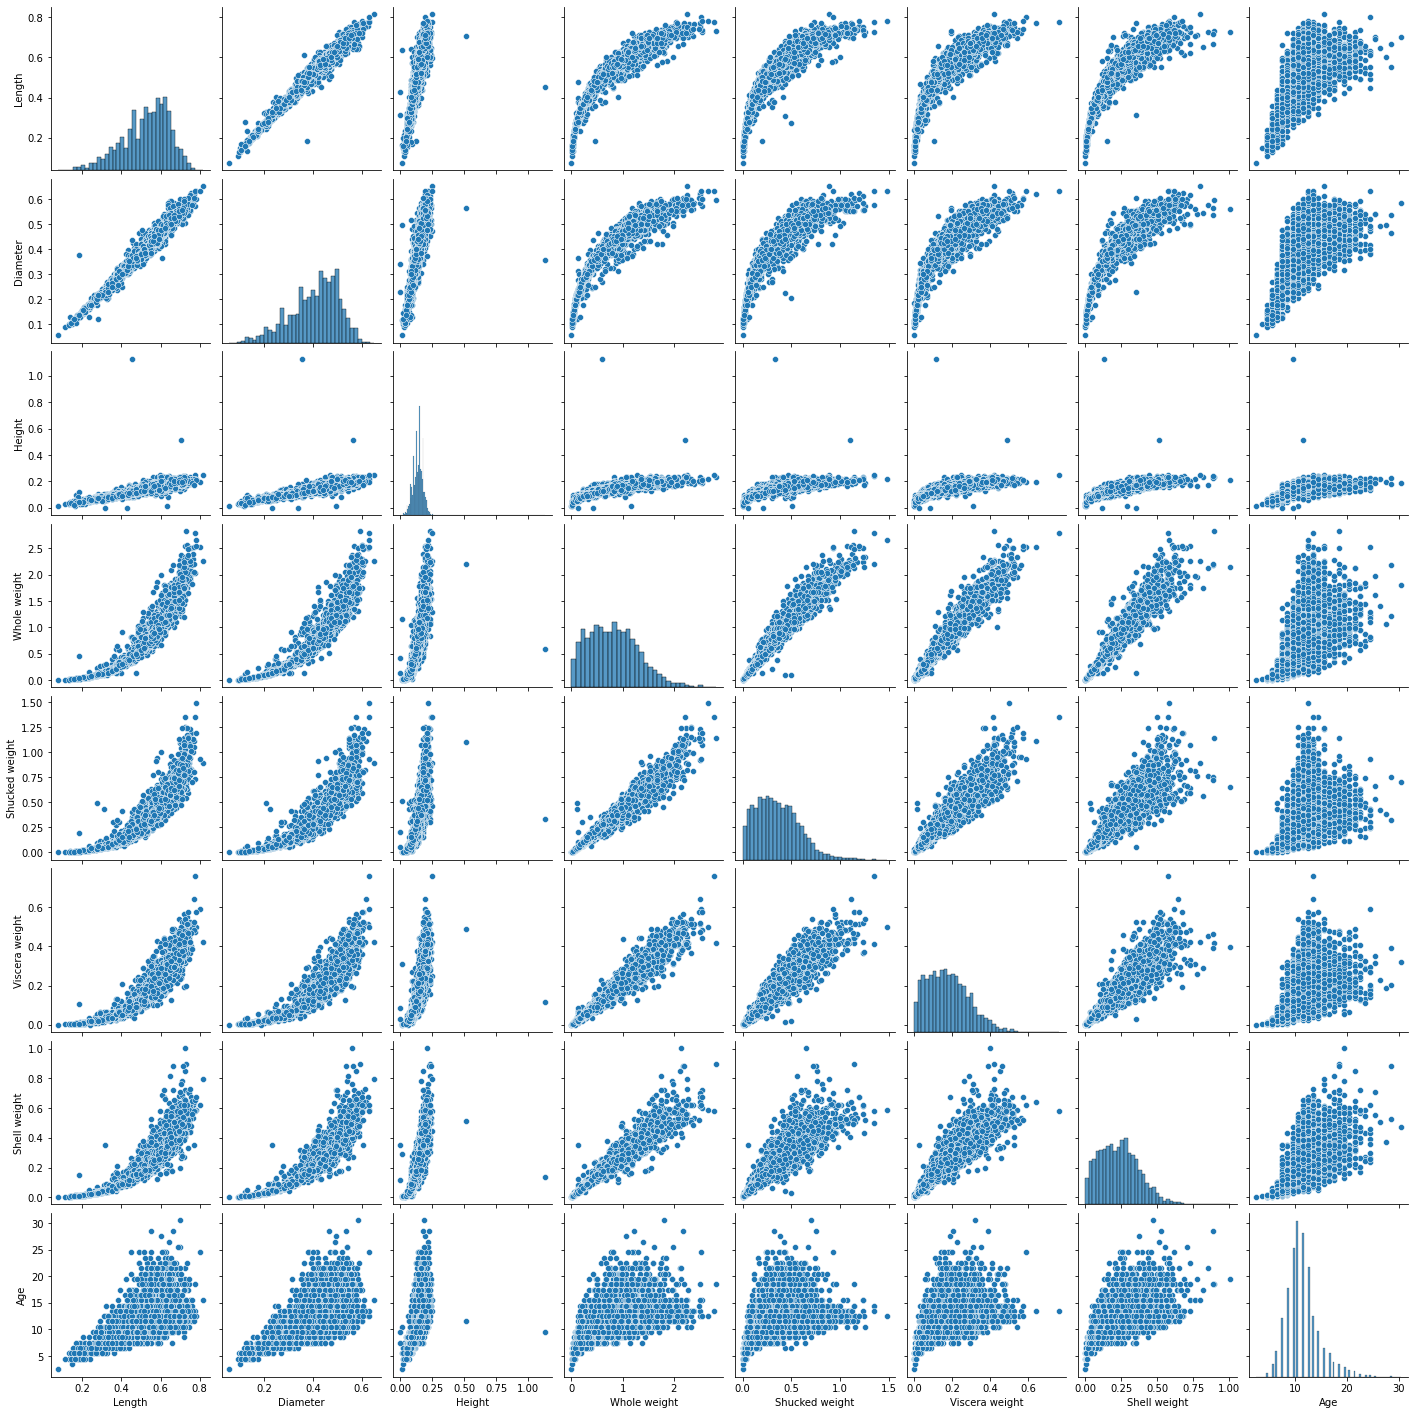

In [39]:
# Plotting scatter plot for finding relation between each variables
sn.pairplot(df)


-Length and diameter show linear correlation.

-Weight is linearly correlated with other whole weight.

-number of rings is positively correlated with almost all 
quadratic features.

-Outliers can be seen in Height feature.

## Multivariate analysis

In [97]:
cor=df.corr()
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


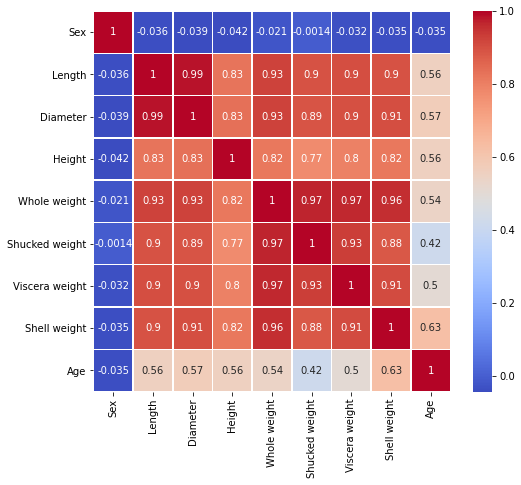

In [98]:
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(8, 7))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

The features are highly correlated with each other.

Whole weight is linearly correlated with all the feature except age.

Rings feature is highest correlated with shell weight followed by height, length and diameter.

length is linearly correlated with diameter.

Height is least correlated feature compared to other features.

Sex columns is showing negative correlation with all the feature so we can drop Sex column










In [250]:
cor['Age'].sort_values(ascending=False)

Age               1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Age, dtype: float64

# Data Preprocessing

In [104]:
# Dropping the sex column
df=df.drop(['Sex'],axis=1)

In [105]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [116]:
# Removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [117]:
new_df.shape

(4027, 8)

In [118]:
df.shape

(4177, 8)

In [119]:
# Data loss percentage
loss=(4177-4027)/4177*100
loss
#Loss percentage data is only 3.59 percent

3.5910940866650707

## Checking the skewness

In [120]:
new_df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

All features are approximatley in acceptable range so no need to perform skewness technique.

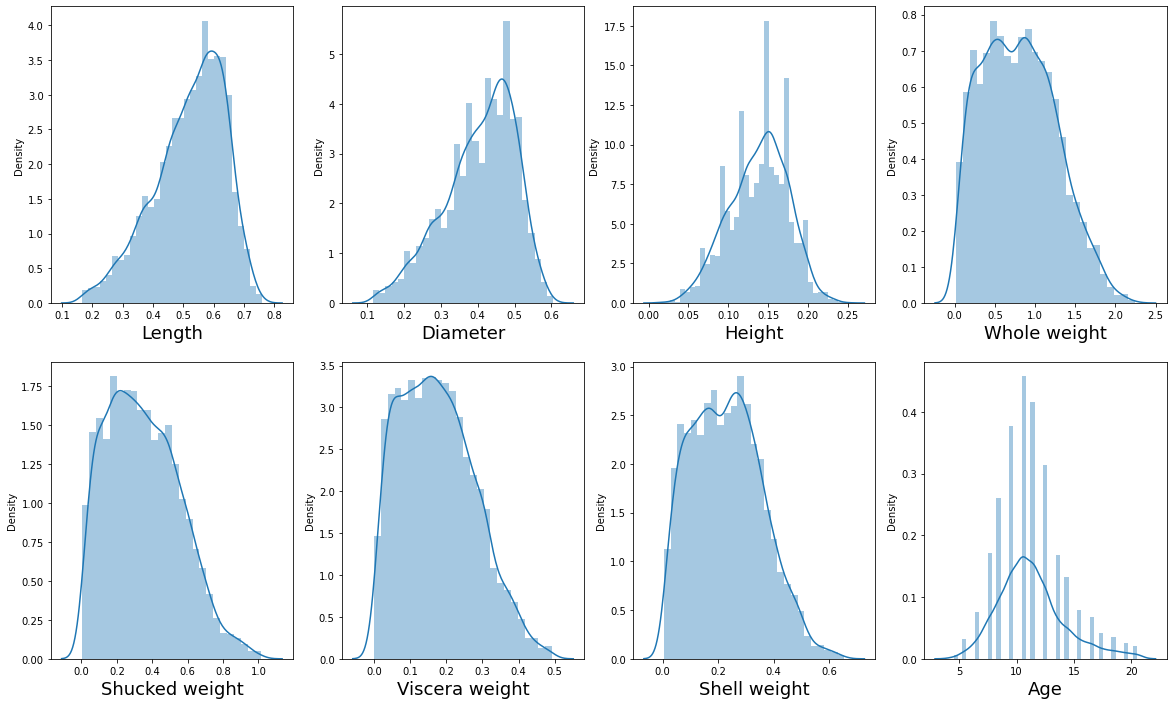

In [138]:
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in new_df:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sn.distplot(new_df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber=plotnumber+1
plt.show()

Now we can see that all plots are normally distributed or less skewed distribution

## Splitting and training the data

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = new_df.drop(['Age'], axis = 1)
y = new_df['Age']


## Standard Scaler

In [134]:
# peforming standard scaling method since every column having value on different scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Finding the best random state

In [136]:
from sklearn.linear_model import LinearRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on radom state',maxRS)

Best accuracy is 0.5521530668667862 on radom state 82


In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

## Applying different models

In [151]:
from sklearn.model_selection import cross_val_score

In [248]:
# Linear Regression method
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
pred=regressor.predict(x_test)
score=r2_score(y_test,pred)
print("R2 score from linear regression is",score)
print("Cross validation score is ",cross_val_score(regressor,x,y,scoring='r2',cv=5).mean())

R2 score from linear regression is 0.5521530668667862
Cross validation score is  0.41472280082211954


In [246]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=20, random_state=82)
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
score=r2_score(y_test,pred)
print("R2 score from Random forest regression is",score)
print("Cross validation score is ",cross_val_score(RFR,x,y,scoring='r2',cv=5).mean())

R2 score from Random forest regression is 0.5486966077586488
Cross validation score is  0.42507912857147634


In [245]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR(kernel = 'rbf')
SR.fit(x, y)
pred=SR.predict(x_test)
score=r2_score(y_test,pred)
print("R2 score from Support Vector Regression is",score)
print("Cross validation score is ",cross_val_score(SR,x,y,scoring='r2',cv=5).mean())

R2 score from Support Vector Regression is 0.5569659449036575
Cross validation score is  0.4589017398103534


In [249]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
pred=neigh.predict(x_test)
score=r2_score(y_test,pred)
print('R2 score from KNN regression is',score)
print("Cross validation score is ",cross_val_score(neigh,x,y,scoring='r2',cv=5).mean())

R2 score from KNN regression is 0.8113898220180333
Cross validation score is  0.276254203557006


## Applying the hyperparameter to the best model

In [156]:
from sklearn.model_selection import GridSearchCV

In [237]:
parameters={
              'C': [0.1,0.8,1.2,1.4],
              'kernel':['linear', 'rbf'],
              'gamma' :[2,6,8,12],
            'shrinking' :[True,False]
           }

In [238]:
GCV=GridSearchCV(SVR(),parameters,cv=5)

In [239]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 1.2, 1.4], 'gamma': [2, 6, 8, 12],
                         'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [240]:
GCV.best_params_

{'C': 1.4, 'gamma': 12, 'kernel': 'rbf', 'shrinking': False}

In [241]:
Final_model=SVR(C=1.4,shrinking=False,gamma=12,kernel='rbf')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print("Accuracy of the model using Support Vector Regression is ",acc*100)

Accuracy of the model using Support Vector Regression is  57.00928843233297


## Saving the model

In [242]:
from sklearn.externals import joblib

In [243]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']